In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

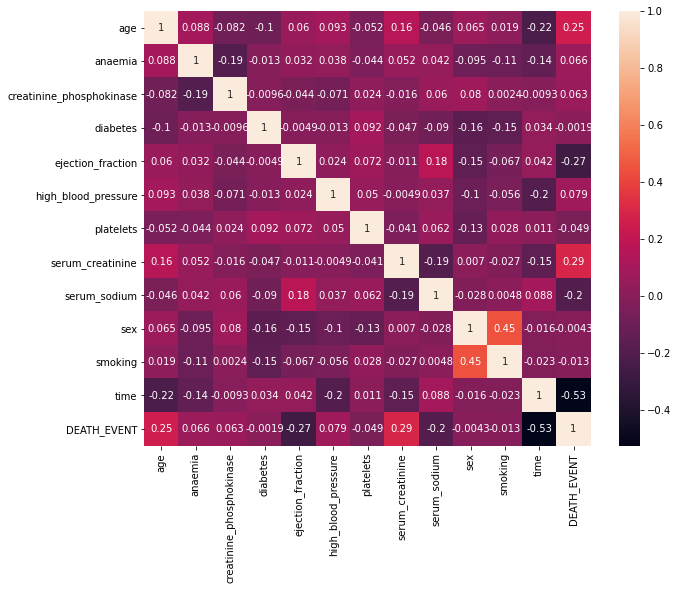

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
discrete_feature = [feature for feature in df.columns if len(df[feature].unique()) < 25]

In [ ]:
print(discrete_feature)
print('Total Discrete feature :',len(discrete_feature))

['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Total Discrete feature : 7


In [ ]:
contineous_feature = [feature for feature in df.columns if feature not in discrete_feature]

In [ ]:
print(contineous_feature)
print('Total contineous feature count is  : ',len(contineous_feature))

['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Total contineous feature count is  :  6


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
X_scale  = df.drop('DEATH_EVENT',axis=1)
y_scale = df['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
sc = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, random_state=0)

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
feature_for_model = SelectFromModel(Lasso(alpha=0.05,random_state=0))
feature_for_model.fit(X_train_scaled,y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [ ]:
feature_for_model.get_support()

array([ True, False, False, False,  True, False, False,  True,  True,
       False, False,  True])

In [ ]:
X_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [ ]:
X = X_train[['age','ejection_fraction','serum_creatinine','serum_sodium','time']]
y = df['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, random_state=0)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[58  4]
 [13 15]]


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
y_pred = rf_random.predict(X_test)

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[60 10]
 [ 2 18]]


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        70
           1       0.64      0.90      0.75        20

    accuracy                           0.87        90
   macro avg       0.81      0.88      0.83        90
weighted avg       0.90      0.87      0.87        90



In [ ]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.57
